<h2>
<span style="color:#6852A3">
Мазур Анастасия Вадимовна, 316
</span>
</h2>

<span style="color:#410083">
<h1>
Анализ данных, связанных с баскетбольными игроками NBA
</h1>
</span>

Данное задание необходимо было реализовать на собственных данных. Я захотела проанализировать такой датасет, тема которого мне близка и интересна. </br>
К тому же, эти данные очень понятны, конкретны и показательны. Это позволяет самостоятельно выдвигать логичные гипотезы и проверять результаты на правдоподобность. 

Устанавливаем необходимые библиотеки Python для дальнейшей работы.

In [ ]:
import pip
pip.main(["install", "matplotlib"])
pip.main(["install", "scikit-learn"])
pip.main(["install", "scikit-image"])
pip.main(["install", "umap-learn"])
pip.main(["install", "n5py"])
pip.main(["install", "hyperopt"])
pip.main(["install", "ipywidgets"])
pip.main(["install", "keras"])
pip.main(["install", "lightgbm"])
pip.main(["install", "numpy"])
pip.main(["install", "pandas"])
pip.main(["install", "plotly"])
pip.main(["install", "scipy"])
pip.main(["install", "seaborn"])
pip.main(["install", "scikit"])
pip.main(["install", "torch"])
pip.main(["install", "torchvision"])
pip.main(["install", "tqdm"])
pip.main(["install", "umap"])
pip.main(["install", "xgboost"])
pip.main(["install", "pep8"])
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from scipy import stats
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline
my_color = '#6852A3'


Данные я брала из открытого источника [DatasetHub](www.datasethub.com). </br>
В разных заданиях датасеты отличаются. Это потому что одни таблицы мне казались более удобными для реализации конкретного задания, потому что имели больше необходимых мне данных, которые я хотела рассмотреть, проанализировать и визуализировать. </br></br>
Давайте же ознакомимся с этими таблицами.

```NBA_STATS``` </br>
Табличка с характеристиками игроков и их основными игровыми показателями. </br>
В таблице 490 записей про действующих на данный момент игроков NBA.

In [47]:
nba_stats = pd.read_csv("./nba/players_stats.csv")
nba_stats

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Xavier Henry,9,86,20,3,13,23.1,0,0,0.0,...,24.0,be,"March 15, 1991",University of Kansas,4,195.0,SF,LAL,99.00,26.035503
486,Zach LaVine,77,1902,778,286,677,42.2,57,167,34.1,...,20.0,us,"March 10, 1995","University of California, Los Angeles",R,192.5,PG,MIN,85.05,22.951594
487,Zach Randolph,71,2304,1143,454,932,48.7,7,20,35.0,...,34.0,us,"July 16, 1981",Michigan State University,13,202.5,PF,MEM,117.00,28.532236
488,Zaza Pachulia,73,1730,606,240,529,45.4,0,3,0.0,...,31.0,ge,"February 10, 1984",NaN,11,207.5,C,MIL,121.50,28.218900


```NBA_PLAYERS```</br>
Таблица побольше. Здесь уже целых 12305 записей о всех игроках NBA, которые когда либо играли в лиге.

In [48]:
nba_players = pd.read_csv("./nba/all_players.csv")
nba_players

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011,1,...,7.6,2.6,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017,1,...,10.8,2.7,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014,1,...,12.1,3.8,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


```NBA_SEASONS```</br>
Совсем большая табличка, 24691 строка с информацией о различных игроках конкретно в каждом игровом сезоне.</br> Позволяет учитывать временной аспект: сравнивать результаты за разные годы, делать прогнозы.

In [49]:
nba_seasons = pd.read_csv("./nba/Seasons_Stats.csv")
nba_seasons

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


<span style="color:#6852A3">
<h2> 
1. Аппроксимация  распределений  данных  с  помощью ядерных оценок. 
</h2>
</span>

Существует мнение, что баскетбол - игра для высоких людей.</br>
Давайте же проанализируем данные и выясним, как распределён рост игроков.

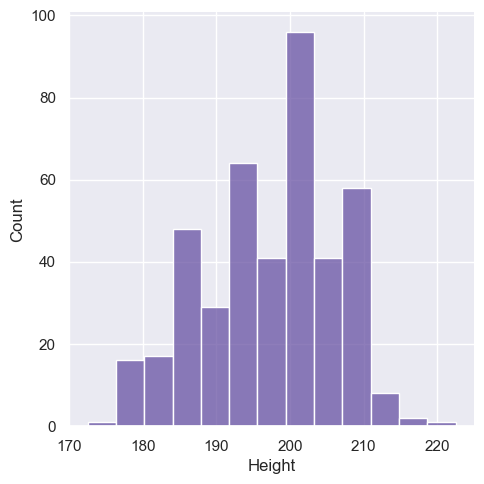

In [50]:
sns.displot(x = 'Height', data = nba_stats, color = my_color)

Как во всех командных играх, в баскетболе у каждого игрока есть своя роль и функции. Это определяется его позицией. </br>
Итак, в баскетболе существует 5 позиций:
1. PG - Point Guard (Разыгрывающий защитник)
2. SG - Shooting Guard (Атакующий защитник)
3. SF - Small Forward (Лёгкий форвард)
4. PF - Power Forward (Тяжёлый форвард)
5. C - Center (Центровой)

**Гипотеза**: Существует корреляция между ростом игрока и его позицией на площадке. </br>
Выделим подмножества данных на нашей гистограмме.

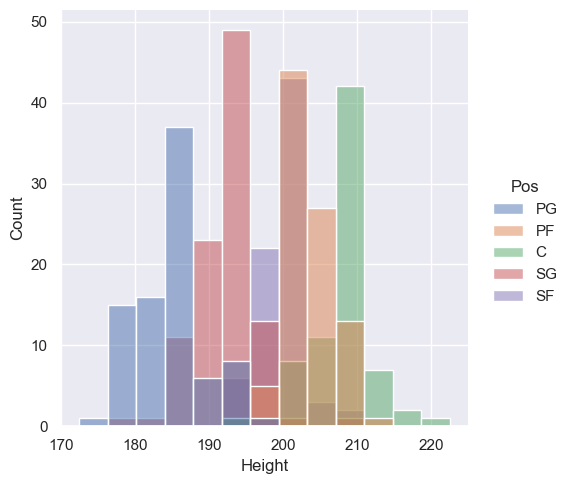

In [51]:
sns.displot(x = 'Height', hue = 'Pos', data = nba_stats)

Для того, чтобы показать это более наглядно, отрисуем гистограммы по росту игроков на каждой из позиций отдельно.</br> А также добавим линию, которая будет отражать характер распределения.</br>
</br>

Для этого используется **метод ядерной оценки плотности**.</br></br>

_**Ядерная оценка плотности (ЯKernel Density Estimation, KDE)** — это непараметрический способ оценки плотности случайной величины. Ядерная оценка плотности является задачей сглаживания данных, когда делается заключение о совокупности, основываясь на конечных выборках данных._</br></br>


Данный метод уже реализован в библиотечной функции `displot`, необходимо просто включить параметр `kde` в аргументах функции. Но каков его принцип работы?</br>
1. Сначала для каждой точки наблюдений строится график нормального распределения с центром в этой точке.</br>
2. Значения каждой нормальной кривой суммируются, а затем полученное значение нормализуется так, чтобы площадь под результирующей кривой стала равна 1.</br>
3. Полученный график сглаживается в зависимости от выбора **полосы пропускания**.</br>
</br>

_**Полоса пропускания ядра** является свободным параметром, который оказывает сильное влияние на результат оценки._</br></br>
Здесь я использую ту пропускную способность, которую предложил `matplotlib` на основе данных, ничего не меняя.

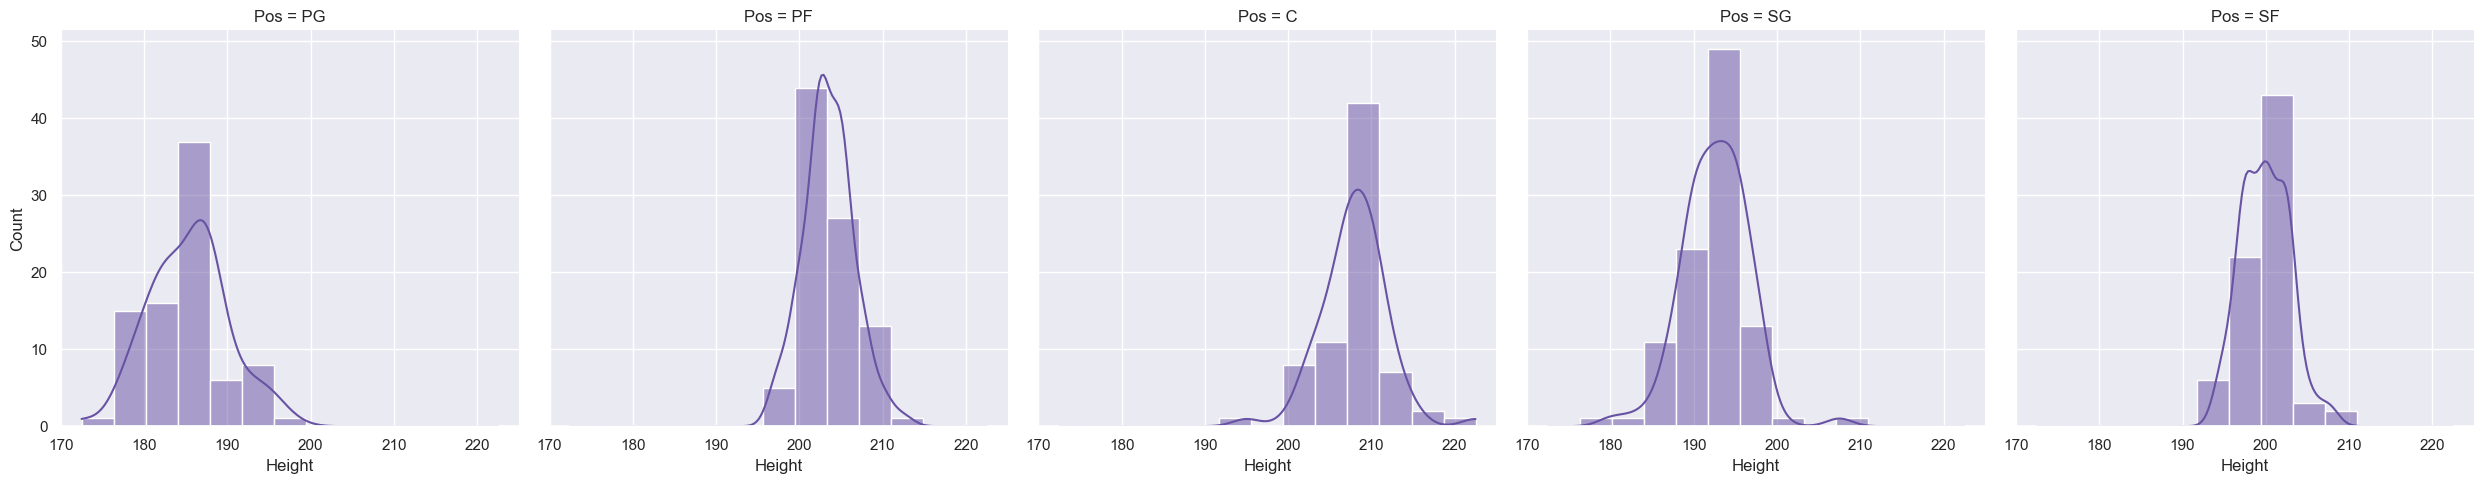

In [79]:
sns.displot(x = 'Height', col = 'Pos', kde = True, data = nba_stats, color = my_color)

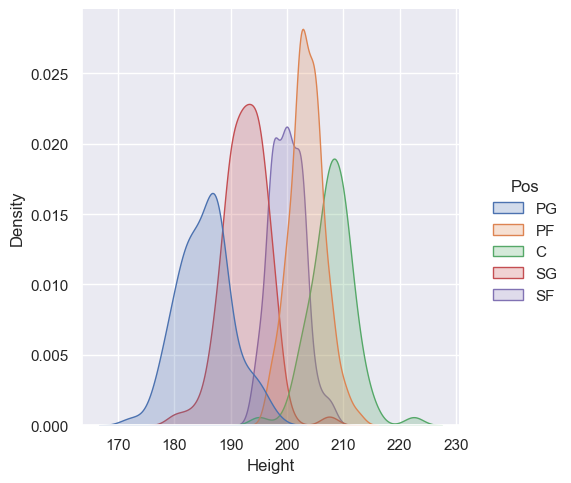

In [85]:
sns.displot(x = "Height",
            hue = "Pos",
            kind = "kde",
            fill = True,
            data = nba_stats);

Таким образом, мы убедились в том, что рост игроков распределён в соответсвии с их позициями, тем самым подтвердив гипотезу наглядно.</br>
Действительно, более низкие игроки обычно играют на позиции PG - Point Guard (Разыгрывающий), потому что обладают большой скоростью и манёвренностью.</br>
Высокие же игроки играют на позиции C - Center (Центровой), потому что пользуясь преимуществами своего роста и комплекции, они могут легко зарабатывать очки под кольцом и отлично защищаться.</br></br>

Вообще, позиция игрока являеется очень хорошей качественной переменной (фактором), потому что позволяет отследить много зависимостей. Поэтому в последующих заданиях будет часто использоваться.

<span style="color:#6852A3">
<h2>
2. Анализ данных с помощью cdplot, dotchart, boxplot, stripchart.
</h2>
</span>

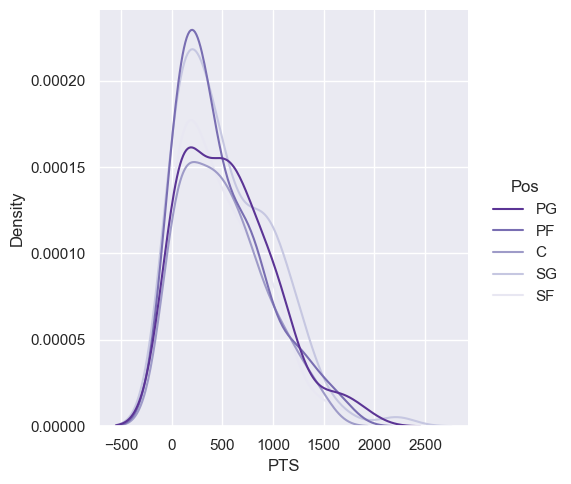

In [86]:
    
sns.displot(data = nba_stats, hue = "Pos", x = "PTS", kind="kde", palette="Purples_r")

<AxesSubplot:xlabel='PTS', ylabel='Pos'>

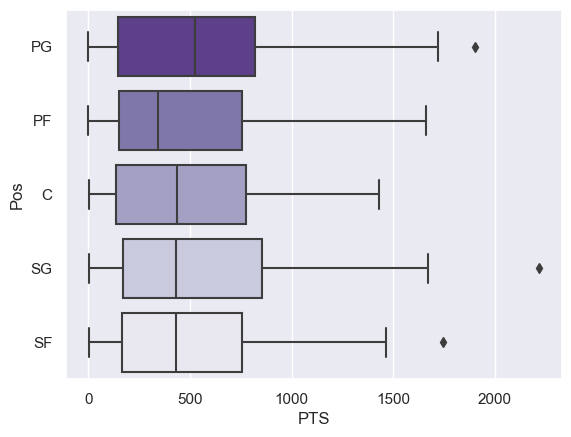

In [73]:
sns.boxplot(data = nba_stats, y = "Pos", x = "PTS", palette="Purples_r")

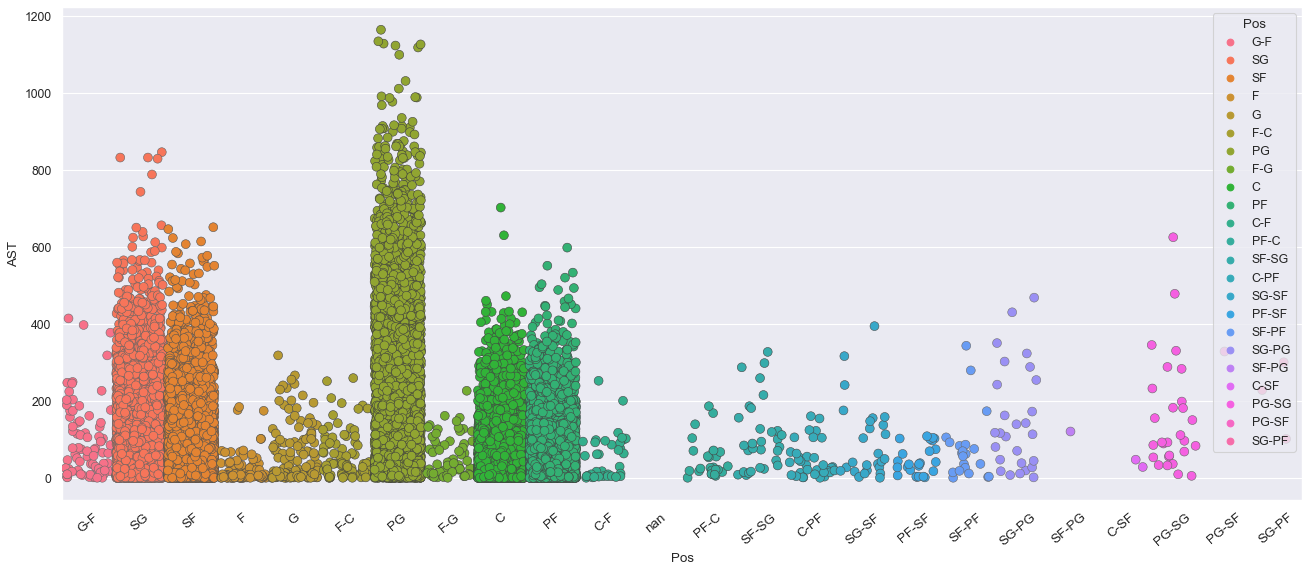

In [88]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=80)
sns.stripplot(data = nba_seasons, y="AST", x = "Pos", hue = 'Pos', jitter=0.45, size=8, linewidth=0.5)
plt.tick_params(axis='x', which='major', labelsize=12, rotation=40)
plt.show()


In [ ]:
PlayerPoints = nba_seasons[['Player','PTS']].groupby('Player').sum().sort_values('PTS', ascending = False)
PlayerPoints

,PTS
Player,
Kareem Abdul-Jabbar*,38387.0
Karl Malone*,36928.0
Wilt Chamberlain*,33953.0
Kobe Bryant,33643.0
Michael Jordan*,32292.0
...,...
Gani Lawal,0.0
Maurice Baker,0.0
Al Jackson,0.0


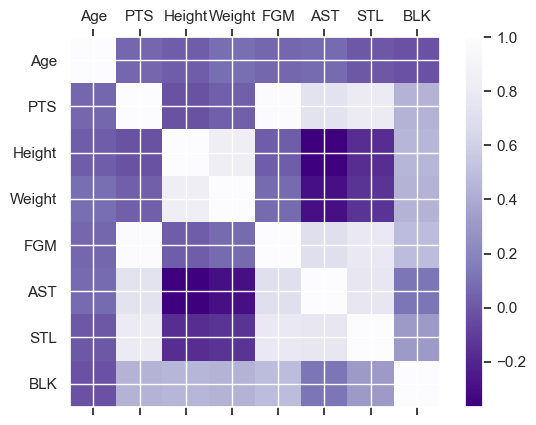

In [84]:
names = ['Age',  'PTS',  'Height', 'Weight', 'FGM','AST', 'STL', 'BLK']

data = nba_stats[names]
data.dropna() # удаление строк с пропусками

correlations = data.corr()
# plot correlation matrix

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, cmap='Purples_r')
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

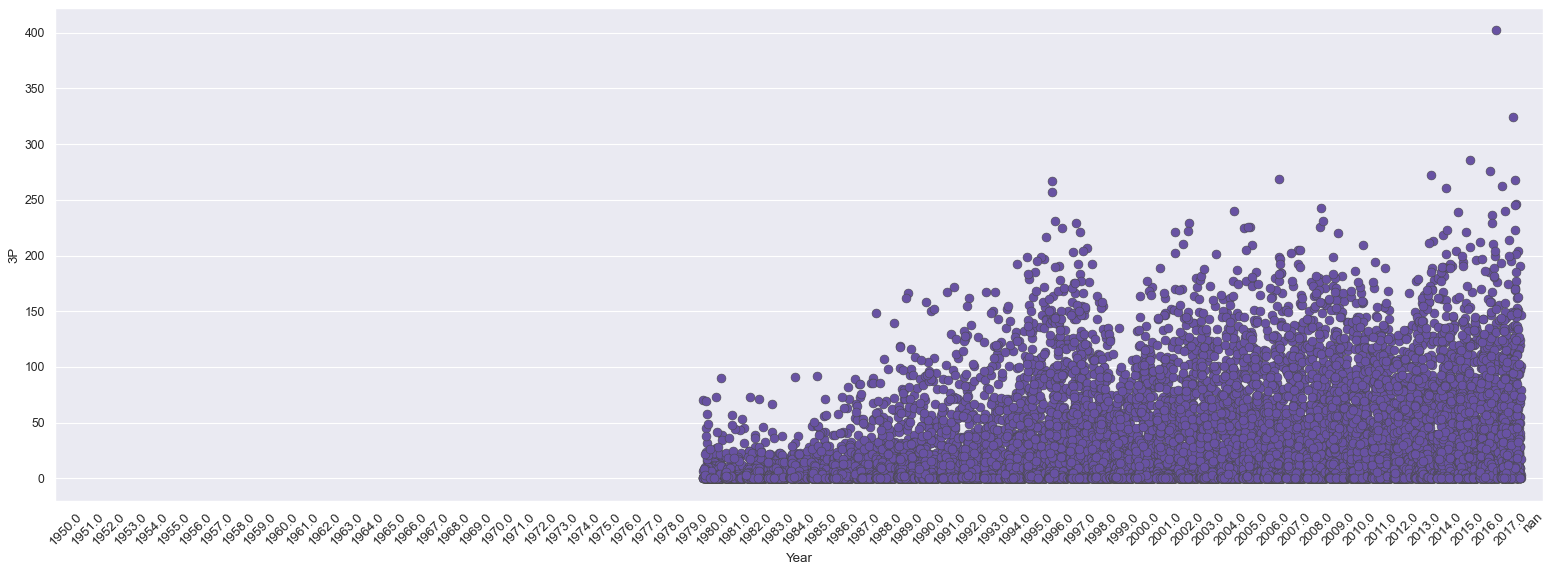

In [ ]:
fig, ax = plt.subplots(figsize=(24, 8), dpi=80)
sns.stripplot(data = nba_seasons, x="Year", y = "3P", jitter=0.45, size=8, linewidth=0.5, color="#6852A3")
plt.tick_params(axis='x', which='major', labelsize=12, rotation=45)

plt.show()

In [ ]:
nba['Pos_num'] = nba['Pos'].map({'PG': 1, 'SG': 2, 'SF': 3, 'PF': 4, 'C': 5})

In [ ]:
# pos_num = np.array([1, 1, 4, 4, 5, 3, 1, 4, 5, 2]) 
# pts = np.array([133, 954, 243, 213, 1156, 20, 778, 1143, 606, 28]) 
# corr = np.corrcoef(pos_num, pts)
# print(corr)

# coef, p = scipy.stats.spearmanr(data1, data2)
# coef, p = scipy.stats.kendalltau(data1, data2)


<span style="color:#6852A3">
<h2>

3. Проверка, являются ли наблюдения выбросами с точки зрения формальных  статистических  критериев  Граббса  и  Q-теста  Диксона. Визуализация результатов. 

</h2>
</span>

<span style="color:#6852A3">
<h2>

4. Инструменты для  заполнения  пропусков  в данных.  Сравнение  результатов заполнения  с истинными значениями. 
   
</h1>
</span>

<span style="color:#6852A3">
<h2>

5. Сгенерировать данные из нормального распределения с различными параметрами и провести анализ с помощью графиков эмпирических функций распределений, квантилей, метода огибающих, а также стандартных процедур проверкигипотез о нормальности(критерии Колмогорова-Смирнова,Шапиро-Уилка,Андерсона-Дарлинга,Крамера фон Мизеса, Колмогорова-Смирнова в модификации Лиллиефорса и Шапиро-Франсия). Рассмотреть выборки малого (не более 50-100 элементов) и умеренного (1000-5000 наблюдений) объемов.

</h2>
</span>


<span style="color:#6852A3">
<h2>

6. Продемонстрировать примеранализаданныхс помощью графиков квантилей, метода огибающих, а также стандартных процедур проверки гипотез о нормальности. Рассмотреть выборки малого и умеренного объемов.

</h2>
</span>

<span style="color:#6852A3">
<h2>

7. Продемонстрироватьприменение для проверки различных гипотези различных доверительных уровней (0.9, 0.95, 0.99) следующих критериев:</br>

- Стьюдента,  включая  односторонние  варианты,  когда проверяемая нулевая гипотеза заключается в том, что одно из сравниваемых средних  значений  больше  (или  меньше)  другого.  Реализовать  оценку мощности  критериев  при  заданном  объеме  выборки  или  определения объема выборки для достижения заданной мощности;
    
- Уилкоксона-Манна-Уитни (ранговые);
  
- Фишера,  Левене,  Бартлетта,  Флигнера-Килина  (проверка гипотез об однородности дисперсий).

</h2>
</span> 

<span style="color:#6852A3">
<h2>

8. Исследовать корреляционные взаимосвязи вданных с помощью коэффициентов корреляции Пирсона, Спирмена и Кендалла.

</h2>
</span>

<span style="color:#6852A3">
<h2>

9. Продемонстрировать использование методов хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля.

</h2>
</span>

<span style="color:#6852A3">
<h2>

10.  Проверить наличие мультиколлинеарности в данных с помощью корреляционной матрицы и фактораинфляции дисперсии.

</h2>
</span>

<span style="color:#6852A3">
<h2>

11.  Исследовать  зависимости  в  данных  с  помощью  дисперсионного анализа.

</h2>
</span>

<span style="color:#6852A3">
<h2>

12.  Подогнать регрессионныемодели  (в  том  числе,  нелинейные)  к данным, а также оценить качество подобной аппроксимации

</h2>
</span>